In [ ]:
#i wil use Kaggle APi to extract the image datasets
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
#import the cats and dogs images from Kaggle using kaggle apis
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:06<00:00, 228MB/s]
100% 812M/812M [00:07<00:00, 122MB/s]


In [10]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [14]:
#printin the images names
file_names = os.listdir('/content/train/')
print(file_names)

['dog.11926.jpg', 'dog.3974.jpg', 'dog.10696.jpg', 'cat.4438.jpg', 'dog.3824.jpg', 'cat.6091.jpg', 'dog.12210.jpg', 'dog.4664.jpg', 'cat.10517.jpg', 'cat.6128.jpg', 'cat.10657.jpg', 'cat.3875.jpg', 'dog.5075.jpg', 'cat.4336.jpg', 'dog.3964.jpg', 'cat.8793.jpg', 'cat.1702.jpg', 'cat.9290.jpg', 'cat.558.jpg', 'dog.8788.jpg', 'cat.5154.jpg', 'cat.186.jpg', 'dog.4890.jpg', 'cat.3218.jpg', 'dog.6439.jpg', 'cat.7775.jpg', 'cat.286.jpg', 'dog.2898.jpg', 'dog.443.jpg', 'cat.3086.jpg', 'dog.390.jpg', 'cat.2949.jpg', 'cat.10751.jpg', 'cat.7968.jpg', 'dog.10470.jpg', 'cat.9311.jpg', 'dog.11516.jpg', 'dog.2477.jpg', 'dog.6467.jpg', 'dog.2406.jpg', 'dog.544.jpg', 'dog.2669.jpg', 'dog.3130.jpg', 'cat.2652.jpg', 'cat.8830.jpg', 'dog.4663.jpg', 'dog.2928.jpg', 'cat.198.jpg', 'cat.11336.jpg', 'cat.6097.jpg', 'dog.7212.jpg', 'dog.5048.jpg', 'dog.1873.jpg', 'dog.11304.jpg', 'dog.7859.jpg', 'cat.11470.jpg', 'dog.8715.jpg', 'dog.7229.jpg', 'cat.9584.jpg', 'cat.5410.jpg', 'dog.1290.jpg', 'dog.6659.jpg', 'do

In [15]:
#importing the Libraries to used
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

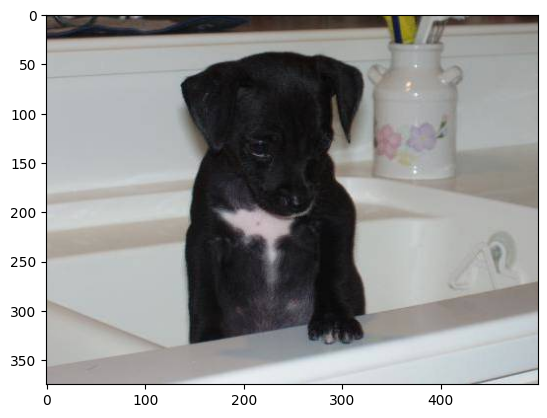

In [16]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

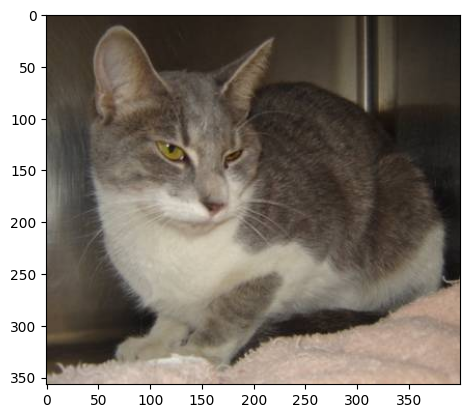

In [17]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
dog
dog
cat
dog


In [19]:
#count the number the dogs and images loaded from the kaggle database
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [20]:
#want Now to resize the images
#creating a directory for resized images
os.mkdir('/content/image resized')

In [23]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

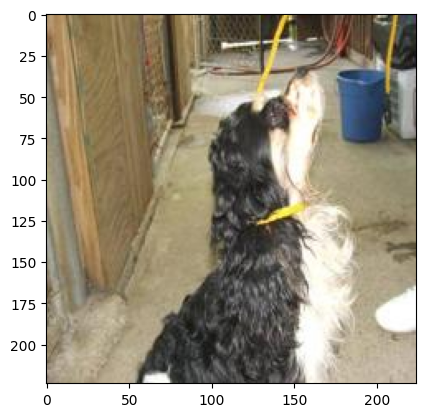

In [25]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10017.jpg')
imgplt = plt.imshow(img)
plt.show()

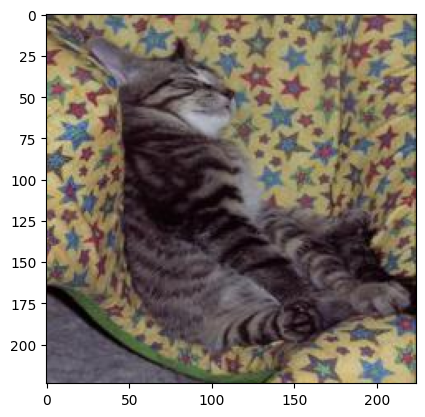

In [27]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10026.jpg')
imgplt = plt.imshow(img)
plt.show()

In [28]:
#Want now to create Lables for the Dogs and Cats where cats should be 0 and Dog should be 1
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [29]:
print(filenames[0:5])
print(len(filenames))

['dog.11926.jpg', 'dog.3974.jpg', 'dog.10696.jpg', 'cat.4438.jpg', 'dog.3824.jpg']
2000


In [30]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [31]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 959 1041]


In [32]:
#converting all the resized  images into a numpy arrays using cv2 and glob lib
import cv2
import glob

In [33]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  [[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  [[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  ...

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 63 103 145]
   [ 65 105 147]
   [ 67 107 149]]

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 61 101 143]
   [ 62 102 144]
   [ 64 104 146]]

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 60 100 142]
   [ 59  99 141]
   [ 61 101 143]]]


 [[[194 249 246]
   [169 226 223]
   [171 230 226]
   ...
   [186 172 160]
   [190 174 162]
   [192 176 164]]

  [[186 239 236]
   [185 240 237]
   [185 242 239]
   ...
   [188 174 162]
   [192 176 164]
   [193 177 165]]

  [[185 235 233]
   [176 229 226]
   [182 237 234]
   ...
   [187 171 159]
   [190 174 162]
   [193 177

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
#checking the shape of the data
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
X = dog_cat_images
Y = np.asarray(labels)

In [39]:
#spiltting the dataset for traing the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X_train.shape,X_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3)


In [42]:
print(Y_train,Y_test)

[0 1 0 ... 1 1 0] [1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1]


In [43]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
print(X_train_scaled)

[[[[0.31372549 0.29803922 0.32156863]
   [0.31764706 0.30196078 0.3254902 ]
   [0.32941176 0.31372549 0.3372549 ]
   ...
   [0.65490196 0.62352941 0.59607843]
   [0.64313725 0.61176471 0.58431373]
   [0.63529412 0.60392157 0.57647059]]

  [[0.3254902  0.30980392 0.33333333]
   [0.32941176 0.31372549 0.3372549 ]
   [0.34117647 0.3254902  0.34901961]
   ...
   [0.69803922 0.66666667 0.63921569]
   [0.68235294 0.65098039 0.62352941]
   [0.67843137 0.64705882 0.61960784]]

  [[0.3254902  0.31764706 0.34117647]
   [0.33333333 0.3254902  0.34901961]
   [0.34509804 0.3372549  0.36078431]
   ...
   [0.74901961 0.71372549 0.69803922]
   [0.7372549  0.70588235 0.67843137]
   [0.72941176 0.69803922 0.67058824]]

  ...

  [[0.19607843 0.19215686 0.20784314]
   [0.19215686 0.18823529 0.20392157]
   [0.19607843 0.2        0.21568627]
   ...
   [0.18823529 0.1372549  0.14509804]
   [0.17647059 0.1254902  0.13333333]
   [0.11764706 0.06666667 0.0745098 ]]

  [[0.1254902  0.12156863 0.1372549 ]
   [0.1

In [45]:
#Build a model using tenserflow
import tensorflow as tf
import tensorflow_hub as hub

In [46]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [47]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [48]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [49]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 34s 615ms/step - loss: 0.2569 - acc: 0.8881
Epoch 2/5
50/50 [==============================] - 30s 603ms/step - loss: 0.0731 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 31s 611ms/step - loss: 0.0546 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 30s 608ms/step - loss: 0.0469 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 31s 618ms/step - loss: 0.0366 - acc: 0.9894


In [50]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 772ms/step - loss: 0.1023 - acc: 0.9650
Test Loss = 0.10234621167182922
Test Accuracy = 0.9649999737739563


Saving dog.jpeg to dog (1).jpeg
1/1 [==============================] - 0s 37ms/step


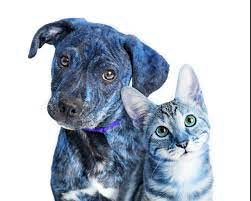

The image contains a Dog.


In [59]:

import cv2
import numpy as np
from PIL import Image
from google.colab import files
import io

# Upload an image file
uploaded = files.upload()

# Check if the uploaded image contains a Dog and/or a Cat
contains_dog = False
contains_cat = False

# Get the uploaded image data
for filename, image_data in uploaded.items():
    # Load the image using PIL
    input_image = Image.open(io.BytesIO(image_data))
    input_image = np.array(input_image)

    # Resize and preprocess the image as you did before
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Make predictions and determine the label
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 0:
        contains_cat = True
    else:
        contains_dog = True

# Display the uploaded image
cv2_imshow(input_image)

# Provide a message based on the prediction
if contains_cat and contains_dog:
    print('The image contains both a Dog and a Cat.')
elif contains_cat:
    print('The image contains a Cat.')
elif contains_dog:
    print('The image contains a Dog.')
else:
    print('The image does not contain a recognizable Cat or Dog.')
